In [ ]:
# Download tickers for all stocks:
#  https://github.com/Benny-/Yahoo-ticker-symbol-downloader
#  https://github.com/shilewenuw/get_all_tickers
#  https://github.com/dpguthrie/yahooquery

In [157]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import keras

# https://towardsdatascience.com/time-series-forecasting-with-deep-learning-and-attention-mechanism-2d001fc871fcß
# https://levelup.gitconnected.com/building-seq2seq-lstm-with-luong-attention-in-keras-for-time-series-forecasting-1ee00958decb

In [25]:
yahoo_tickers = pd.read_csv('generic.csv')

In [26]:
yahoo_tickers.columns

Index(['Ticker', 'Name', 'Exchange', 'exchangeDisplay', 'Type', 'TypeDisplay'], dtype='object')

In [149]:
yahoo_tickers.head()

,Ticker,Name,Exchange,exchangeDisplay,Type,TypeDisplay
0,B,Barnes Group Inc.,NYQ,NYSE,S,Equity
1,BA,The Boeing Company,NYQ,NYSE,S,Equity
2,BMRA,"Biomerica, Inc.",PNK,OTC Markets,S,Equity
3,BOACU,Bluescape Opportunities Acquisition Corp.,NYS,NYSE,S,Equity
4,BNL,"Broadstone Net Lease, Inc.",NYS,NYSE,S,Equity


In [152]:
num_tickers = len(yahoo_tickers)
def random_ticker():
    return yahoo_tickers.loc[np.random.randint(num_tickers)]  

In [100]:
yahoo_tickers.Type.unique()

array(['S', 'E', 'M', 'I', 'F', 'C', 'O', 'B', 'Y'], dtype=object)

In [101]:
yahoo_tickers.TypeDisplay.unique()

array(['Equity', 'ETF', 'Fund', 'Index', 'Futures', 'Currency', 'Option',
       'CRYPTOCURRENCY', 'MoneyMarket'], dtype=object)

In [27]:
yahoo_tickers.exchangeDisplay.unique()

array(['NYSE', 'OTC Markets', 'NASDAQ', 'NYSE MKT', 'NYSEArca', 'Toronto',
       'OTC BB', 'Australian', 'Sao Paolo', 'NASDAQ GIDS', 'Oslo',
       'NY Mercantile', 'Industry', 'Berlin', 'Dusseldorf Stock Exchange',
       'Munich', 'Dow Jones', 'Frankfurt', 'Singapore', 'Stuttgart',
       'Hamburg', 'Chicago Board Options Exchange',
       'Prague Stock Exchange', 'XETRA', 'Paris', 'Swiss', 'Irish',
       'Mexico', 'Hong Kong', 'CDNX', 'Buenos Aires', 'London',
       'New York Board of Trade', 'Euronext', 'Tokyo Stock Exchange',
       'NSE', 'Amsterdam', 'CNQ', 'FTSEGlobal Index', 'Milan', 'Vienna',
       'Chicago Mercantile Exchange', 'Chicago Board of Trade', 'Taiwan',
       'SNP', 'Tel Aviv', 'New Zealand', 'Copenhagen', 'Stockholm',
       'Bombay', 'Shanghai', 'Hanover', 'Madrid Stock Exchange CATS',
       'Johannesburg Stock Exchange', 'KOSDAQ', 'CCY', 'MCX',
       'Kuala Lumpur Stock Exchange', 'RIS', 'SET', 'TLX Exchange',
       'Osaka Stock Exchange', 'Athens', 'Jak

In [106]:
yahoo_tickers[yahoo_tickers.exchangeDisplay=='SNP']

,Ticker,Name,Exchange,exchangeDisplay,Type,TypeDisplay
1968,^GSPC,S&P 500,SNP,SNP,I,Index
3308,^KVRP,S&P Kensho Virtual Reality Inde,SNP,SNP,I,Index
3312,^KVR,S&P Kensho Virtual Reality Inde,SNP,SNP,I,Index
4175,^NJCU50TR,NJCU New Jersey 50 Total Return,SNP,SNP,I,Index
4177,^NJCU50PR,NJCU New Jersey 50 Price Return,SNP,SNP,I,Index
...,...,...,...,...,...,...
77889,^SYINFO,Syntax Stratified Information I,SNP,SNP,I,Index
77890,^SYIND,Syntax Stratified Industrials I,SNP,SNP,I,Index
77908,^SYLC,Syntax Stratified LargeCap Inde,SNP,SNP,I,Index
79354,^TPXR,S&P CoreLogic Case-Shiller Tamp,SNP,SNP,I,Index


In [102]:
yahoo_tickers[yahoo_tickers.Ticker.apply(lambda x: x.startswith('^')) ].TypeDisplay.unique()

array(['Index', 'ETF'], dtype=object)

In [99]:
 yahoo_tickers[(yahoo_tickers.Type!='I') & yahoo_tickers.Ticker.apply(lambda x: x.startswith('^'))]

,Ticker,Name,Exchange,exchangeDisplay,Type,TypeDisplay
38870,^BND,VANGUARD BD IDX FD,ASE,NYSE MKT,E,ETF
59612,^ADFI-IV,NFIELD DYNAMIC FIXED INCOME ETF,ASE,NYSE MKT,E,ETF
68009,^CDC,VICTORY PTF II,NIM,NASDAQ GIDS,E,ETF
68011,^CID,VICTORY PTF II,NIM,NASDAQ GIDS,E,ETF
68013,^CSF,VICTORY PTF II,NIM,NASDAQ GIDS,E,ETF
68014,^CFA,VICTORY PTF II,WCB,Chicago Board Options Exchange,E,ETF


In [38]:
yahoo_tickers[(yahoo_tickers.exchangeDisplay=='NASDAQ')]

,Ticker,Name,Exchange,exchangeDisplay,Type,TypeDisplay
5,BVS,Bioventus Inc.,NMS,NASDAQ,S,Equity
7,BIOT,Biotech Acquisition Company,NMS,NASDAQ,S,Equity
9,BYTSU,BYTE Acquisition Corp.,NMS,NASDAQ,S,Equity
15,CENHU,Centricus Acquisition Corp.,NMS,NASDAQ,S,Equity
26,DBTX,"Decibel Therapeutics, Inc.",NMS,NASDAQ,S,Equity
...,...,...,...,...,...,...
80512,TISEX,TIAA-CREF Quant Small-Cap Equity Fund Institut...,NAS,NASDAQ,M,Fund
80513,TISHX,DWS Communications Fund - Class A,NAS,NASDAQ,M,Fund
80514,TISRX,TIAA-CREF Short-Term Bond Fund Retirement Class,NAS,NASDAQ,M,Fund
80515,TISIX,TIAA-CREF Short-Term Bond Fund Institutional C...,NAS,NASDAQ,M,Fund


In [21]:
yahoo_tickers.Ticker[4]

'BNL'

In [132]:
yahoo_tickers.Ticker[87]

'JCICW'

In [161]:
generic_ticker = yf.Ticker(yahoo_tickers.Ticker[3453])
kvrp = yf.Ticker('^GSPC')
msft = yf.Ticker("MSFT")
pfe = yf.Ticker('PFE')

In [145]:
generic_ticker.info

{'zip': '10177',
 'sector': 'Financial Services',
 'longBusinessSummary': 'Moringa Acquisition Corp is a blank check company. The company intends to enter into a merger, share exchange, asset acquisition, share purchase, recapitalization, reorganization, or other similar business combination with one or more businesses or entities. The company was incorporated in 2020 and is based in New York, New York.',
 'city': 'New York',
 'phone': '212 572 6395',
 'state': 'NY',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'http://www.moringaac.com',
 'maxAge': 1,
 'address1': '250 Park Avenue',
 'industry': 'Shell Companies',
 'address2': '7th Floor',
 'previousClose': 9.94,
 'regularMarketOpen': 9.95,
 'twoHundredDayAverage': 10.235852,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 9.95,
 'navPrice': None,
 'averageDailyVolume10Day': 134071,
 'totalAssets': None,
 'regularMarketPreviousClose': 9.94,
 'fiftyDayAverage

In [ ]:
# get stock info
generic_ticker.info

In [162]:
day = datetime.date(1980,1,1)
# get historical market data
hist = generic_ticker.history(period="10y")
# hist.describe()
# hist.dtypes
# hist = hist[pd.to_datetime(hist.index).date>day]
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-03-28,20.078053,20.326367,19.900685,20.078053,257040,0.0,0.0
2011-03-29,20.007104,20.007104,19.865209,19.936157,151200,0.0,0.0
2011-03-30,19.936159,20.148999,19.829737,19.900684,246240,0.0,0.0
2011-03-31,19.936157,20.113525,19.936157,19.936157,102600,0.0,0.0
2011-04-01,20.007105,20.007105,19.865210,19.900684,52920,0.0,0.0
...,...,...,...,...,...,...,...
2021-03-22,60.700001,62.200001,59.200001,60.200001,8580865,0.0,0.0
2021-03-23,60.500000,60.900002,58.000000,58.200001,6527320,0.0,0.0
2021-03-24,58.200001,59.500000,57.700001,58.599998,2452150,0.0,0.0


<AxesSubplot:xlabel='Date'>

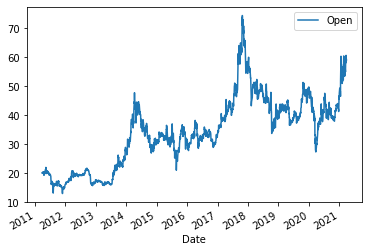

In [163]:
hist.plot(y='Open')

In [147]:
hist = hist.reset_index()

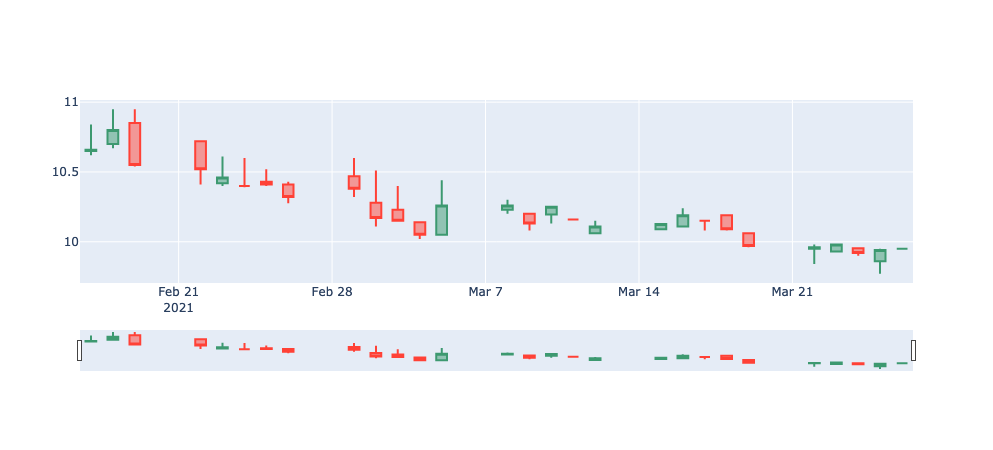

In [148]:
fig = go.Figure(data=[go.Candlestick(x=hist['Date'],
                                   open=hist['Open'],
                                    high=hist['High'],
                                    low=hist['Low'],
                                    close=hist['Close'])])
fig.show()

In [19]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [11]:
# show actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0


In [ ]:
# show dividends
msft.dividends

In [ ]:
# show splits
msft.splits

In [ ]:
# show financials
print(msft.financials)
msft.quarterly_financials


In [ ]:
# show major holders
msft.major_holders

In [ ]:
# show institutional holders
msft.institutional_holders

In [ ]:
# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet


In [ ]:
# show cashflow
msft.cashflow
msft.quarterly_cashflow


In [ ]:
# show earnings
msft.earnings
msft.quarterly_earnings

In [ ]:

# show sustainability
msft.sustainability


In [ ]:

# show analysts recommendations
msft.recommendations

In [ ]:

# show next event (earnings, etc)
msft.calendar



In [ ]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin


In [ ]:
# show options expirations
msft.options

In [ ]:

# get option chain for specific expiration
opt = msft.option_chain('2021-03-26')
# data available via: opt.calls, opt.puts